# Importing Libraries

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading And pre-processing

In [105]:
# Loading all datsets
google_train_df = pd.read_csv("/content/Google_Stock_Train (2010-2022).csv")
msft_df = pd.read_csv("/content/MSFT.csv")

In [106]:
# viewing Google training Dataset
google_train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [107]:
# viewing Microdoft Dataset
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


# Chekcing for any null values

In [108]:
google_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [109]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


# Data visualisation

## Google

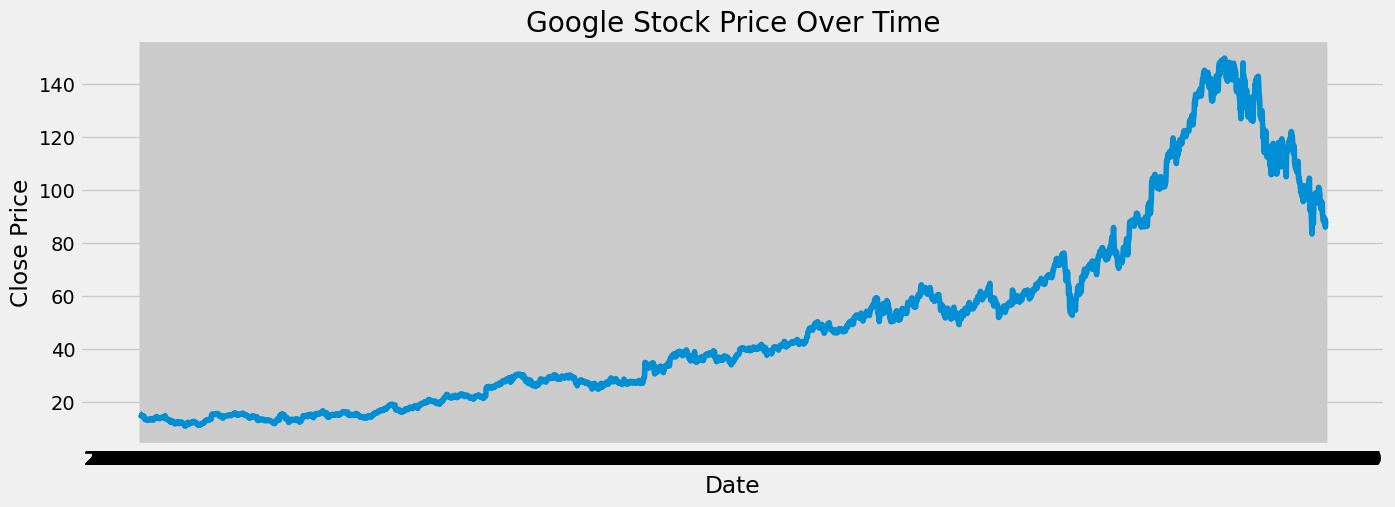

In [110]:
# Plotting graph for google stock as per time
plt.figure(figsize=(15, 5))
plt.plot(google_train_df['Date'], google_train_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google Stock Price Over Time')
plt.show()

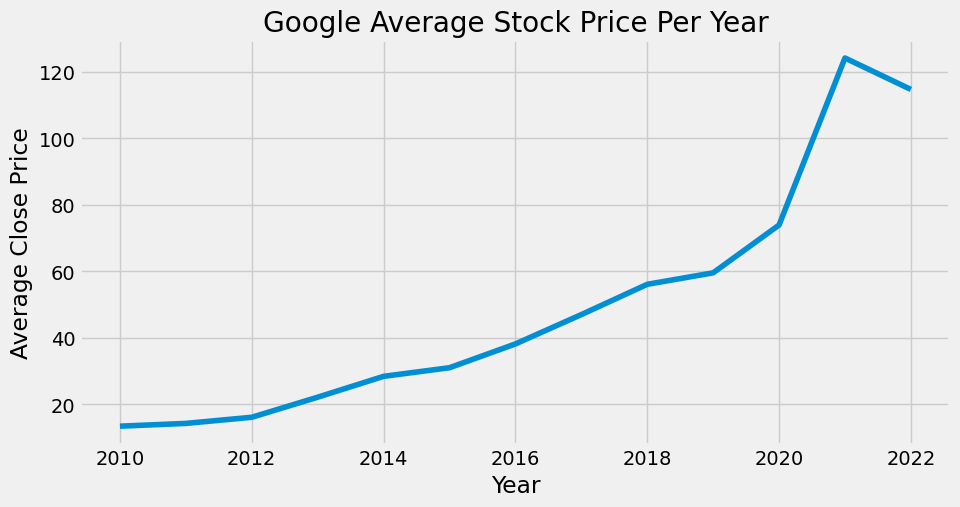

In [111]:
# Extract year from the 'Date' column
google_train_df['Year'] = pd.to_datetime(google_train_df['Date']).dt.year

# Group the data by year and calculate the average closing price
yearly_avg = google_train_df.groupby('Year')['Close'].mean()

# Plot the yearly average closing prices
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Google Average Stock Price Per Year')
plt.show()

## Microsoft

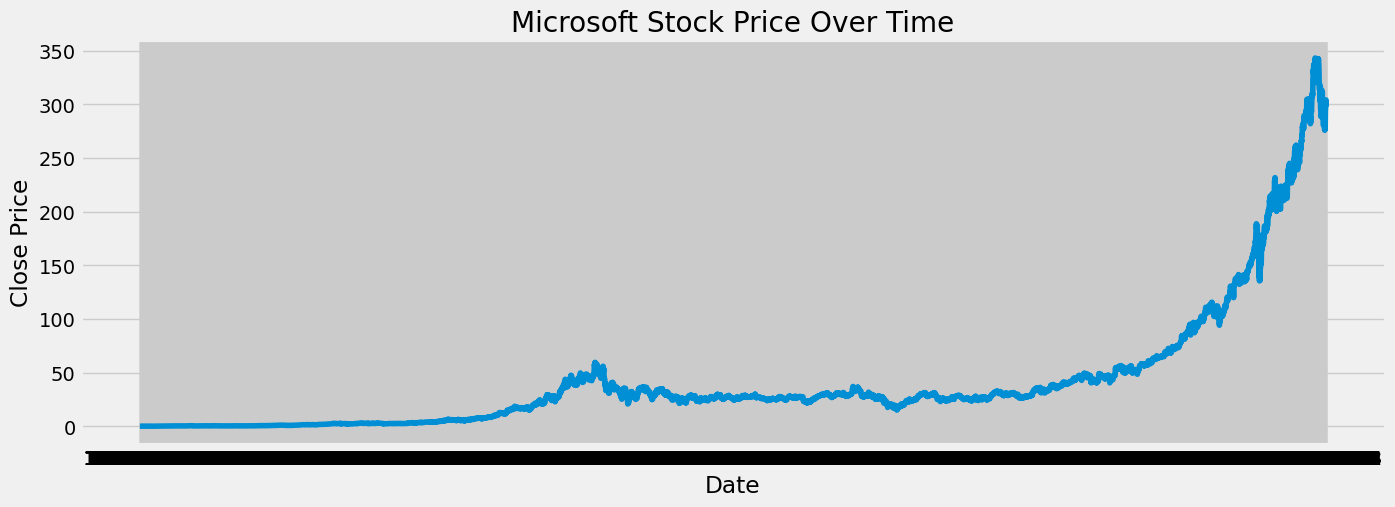

In [112]:
# Plotting graph for google stock as per time
plt.figure(figsize=(15, 5))
plt.plot(msft_df['Date'], msft_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Microsoft Stock Price Over Time')
plt.show()

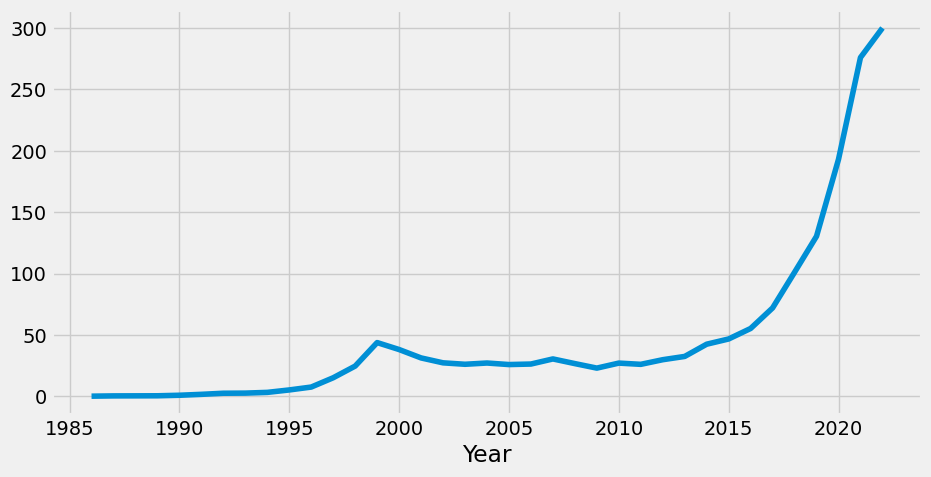

In [113]:
# Extract year from the 'Date' column
msft_df['Year'] = pd.to_datetime(msft_df['Date']).dt.year

# Group the data by year and calculate the average closing price
yearly_avg = msft_df.groupby('Year')['Close'].mean()

# Plot the yearly average closing prices
plt.figure(figsize=(10, 5))
yearly_avg = msft_df.groupby('Year')['Close'].mean()

# Plot the yearly average closing price
yearly_avg.plot()

# Show the plot
plt.show()

# MODEL BUILDING

In [114]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.metrics import mean_squared_error

## Microsoft

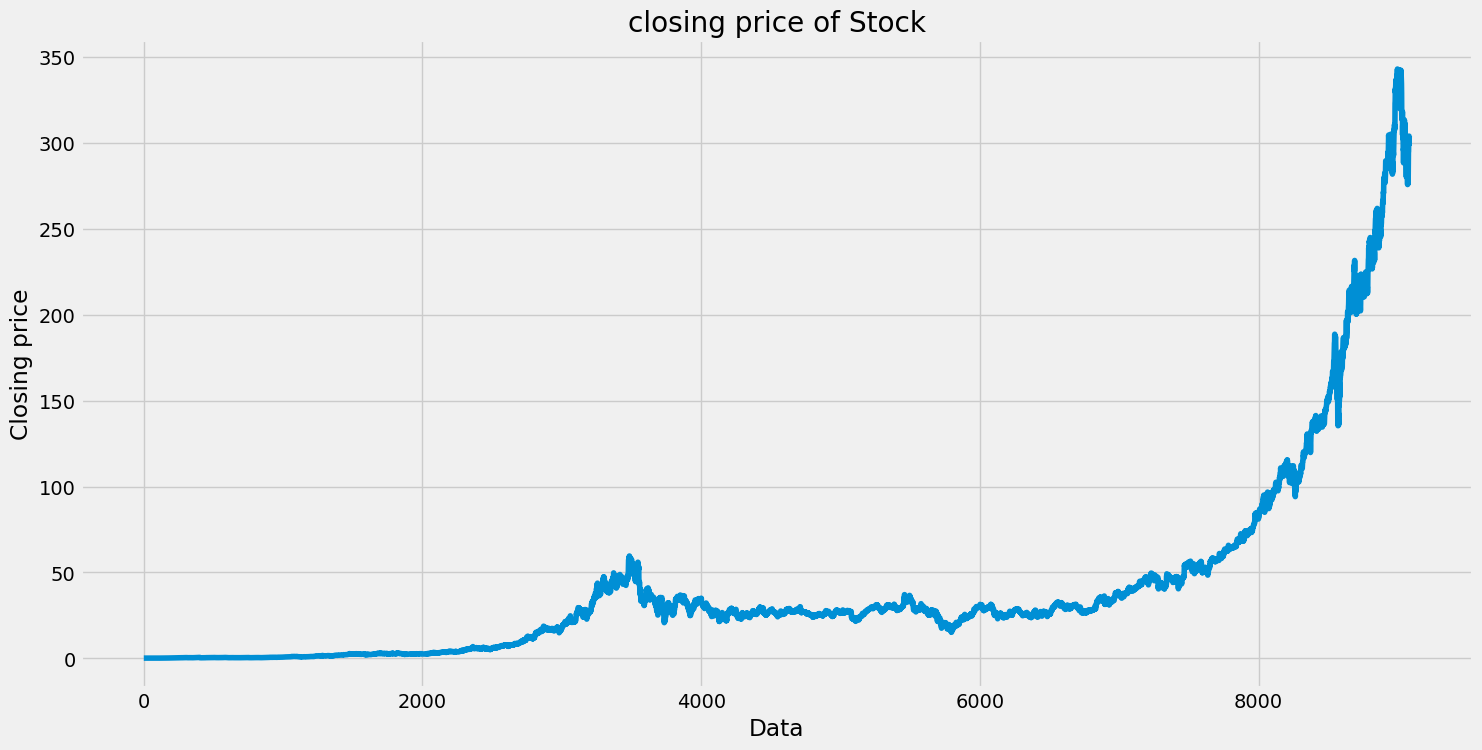

In [115]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(msft_df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [116]:
#create new database with only required coloumns
data=msft_df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

7267

In [117]:
#scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


In [118]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [119]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [120]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In [121]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [122]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [123]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0082
Epoch 2/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3746e-04
Epoch 3/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.0734e-04
Epoch 4/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.1100e-04
Epoch 5/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.5749e-04


In [124]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [125]:
#convert the data to numpy
x_test=np.array(x_test)

In [126]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [127]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[[ 45.52667 ]
 [ 45.646748]
 [ 45.86811 ]
 ...
 [247.18463 ]
 [250.9616  ]
 [253.17995 ]]


In [128]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

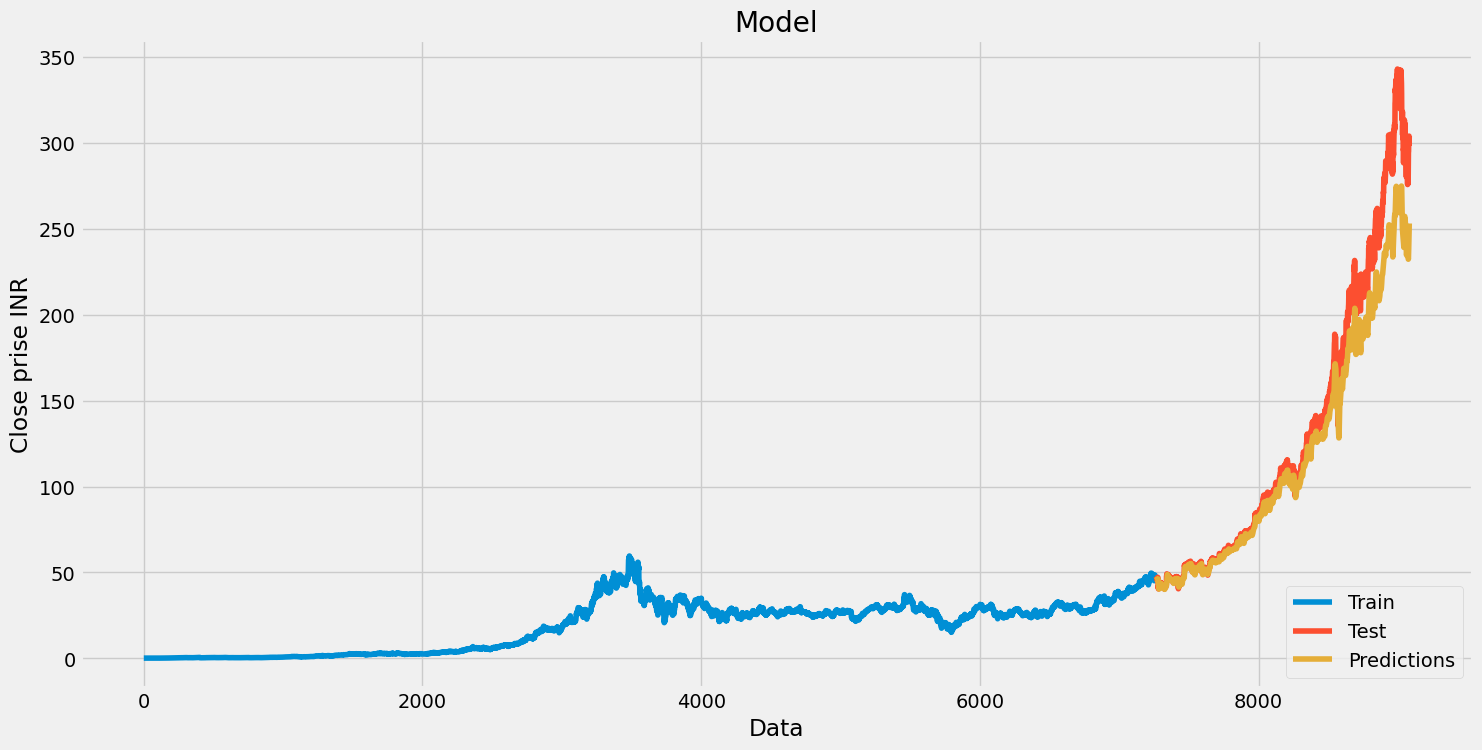

In [129]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

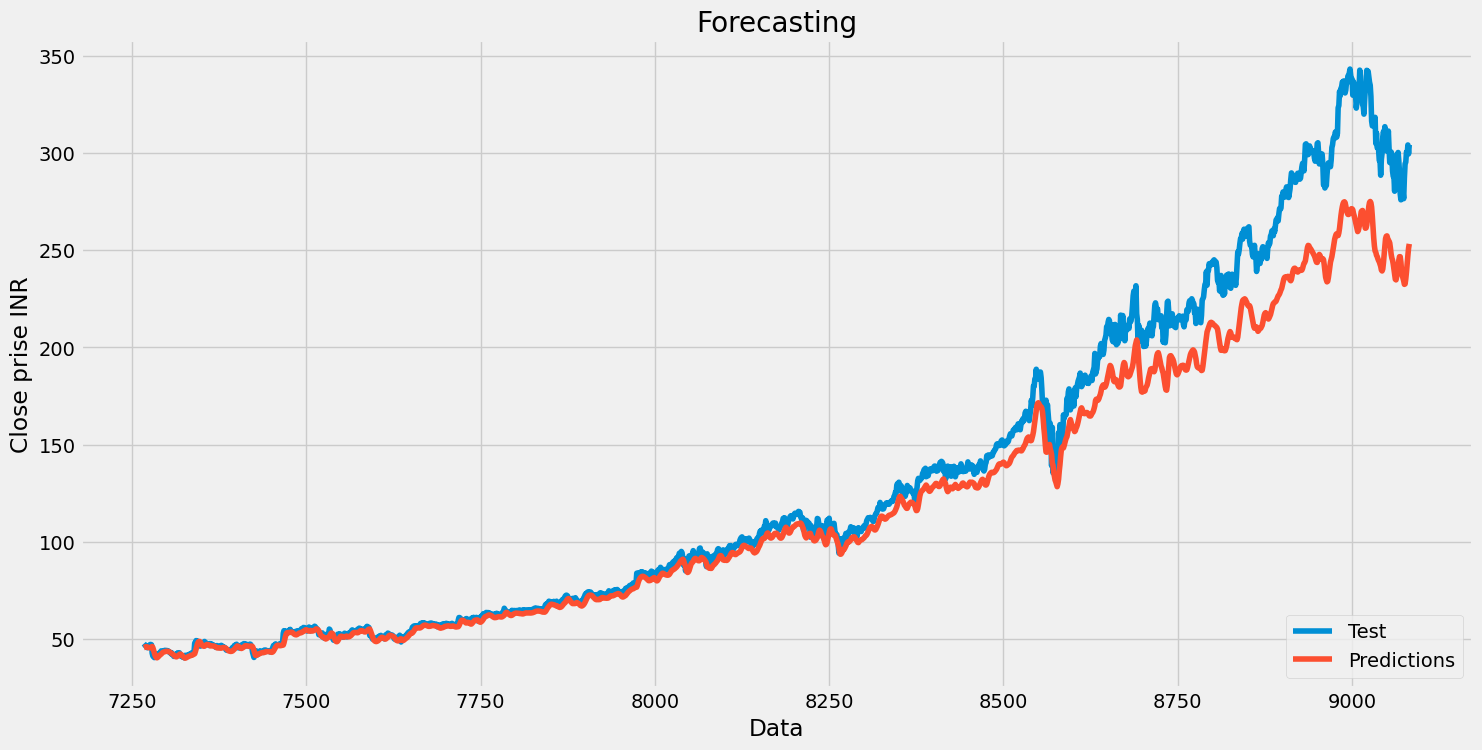

In [130]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Forecasting')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
#plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Test','Predictions'],loc='lower right')
plt.show()

In [131]:
#show the valid and predicted value
valid

,Close,Predictions
7267,47.590000,45.526669
7268,47.189999,45.646748
7269,46.599998,45.868111
7270,46.360001,45.989727
7271,45.959999,45.997784
...,...,...
9078,300.429993,238.773438
9079,299.160004,243.231628
9080,304.059998,247.184631
9081,299.489990,250.961594


## GOOGLE

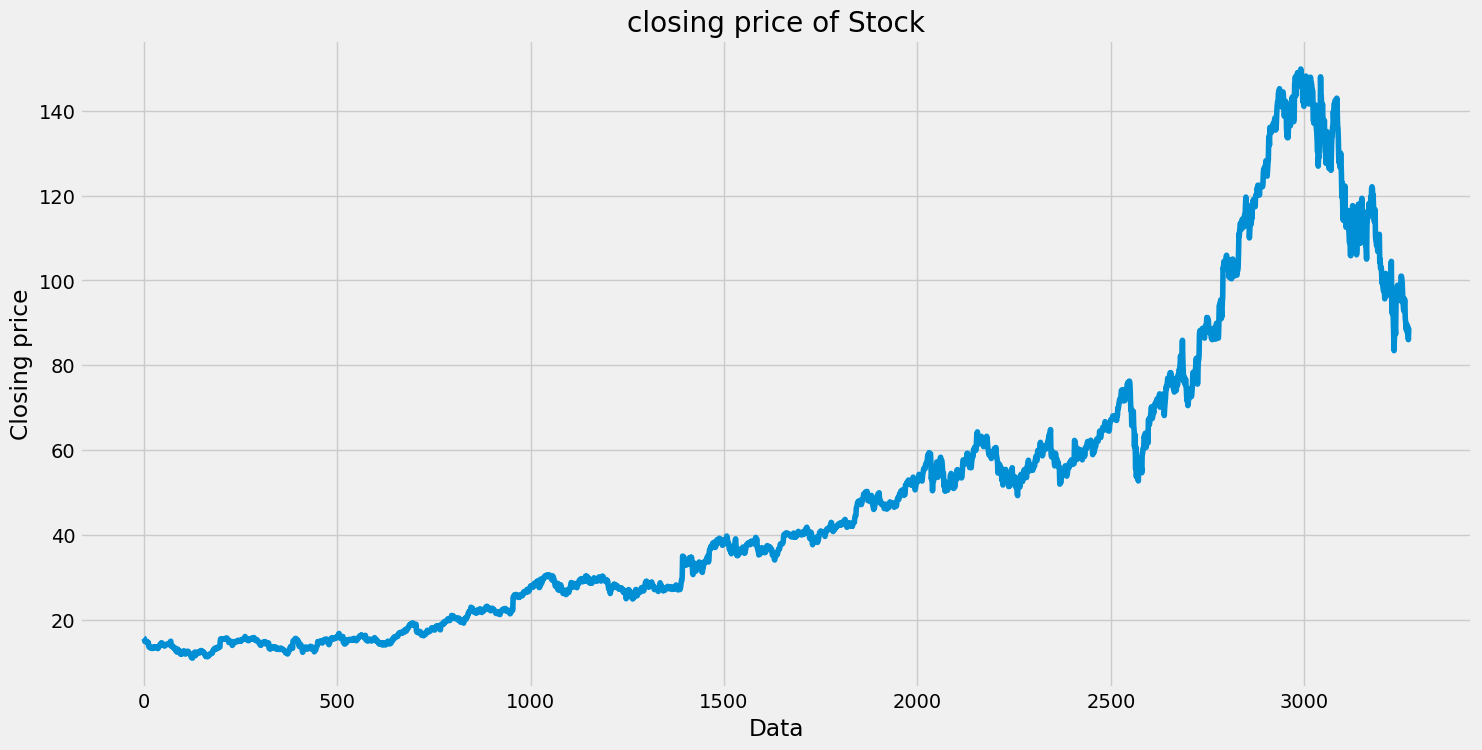

In [132]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(google_train_df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [133]:
#create new database with only required coloumns
data=google_train_df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2618

In [134]:
#scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  -2.0847219631103184e-16
Standard deviation of processed data:  1.0


In [135]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [136]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(2558, 60, 1)

In [137]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (2558, 60, 1)
x_train shape after reshaping (2558, 60, 1)


In [138]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [139]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [140]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0573
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.5984e-04


In [141]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [142]:
#convert the data to numpy
x_test=np.array(x_test)

In [143]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [144]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[ 70.450424]
 [ 70.7025  ]
 [ 70.94722 ]
 [ 71.19815 ]
 [ 71.410835]
 [ 71.45482 ]
 [ 71.5192  ]
 [ 71.62534 ]
 [ 71.762566]
 [ 71.9643  ]
 [ 71.87238 ]
 [ 71.66891 ]
 [ 71.45467 ]
 [ 71.37811 ]
 [ 71.417   ]
 [ 71.42772 ]
 [ 71.37331 ]
 [ 71.41312 ]
 [ 71.569176]
 [ 71.624214]
 [ 71.65602 ]
 [ 71.2838  ]
 [ 70.88018 ]
 [ 70.59748 ]
 [ 70.52913 ]
 [ 70.7302  ]
 [ 71.21769 ]
 [ 71.78129 ]
 [ 72.40592 ]
 [ 73.08329 ]
 [ 73.82893 ]
 [ 74.41157 ]
 [ 74.88464 ]
 [ 75.226   ]
 [ 75.44398 ]
 [ 75.573616]
 [ 75.86631 ]
 [ 76.18241 ]
 [ 76.521614]
 [ 76.598976]
 [ 76.46811 ]
 [ 76.32698 ]
 [ 76.06011 ]
 [ 75.83824 ]
 [ 75.73284 ]
 [ 75.453255]
 [ 75.07023 ]
 [ 74.614204]
 [ 74.18577 ]
 [ 73.940735]
 [ 73.794106]
 [ 73.7127  ]
 [ 73.59887 ]
 [ 73.610565]
 [ 73.7433  ]
 [ 73.877686]
 [ 74.06001 ]
 [ 74.4504  ]
 [ 74.872734]
 [ 75.43193 ]
 [ 76.01628 ]
 [ 76.60793 ]
 [ 77.249756]
 [ 78.048485]
 [ 78.78394 ]
 [ 79.46329 ]
 [ 79.99122 ]
 [ 80.50095 ]
 [ 81.25

In [145]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

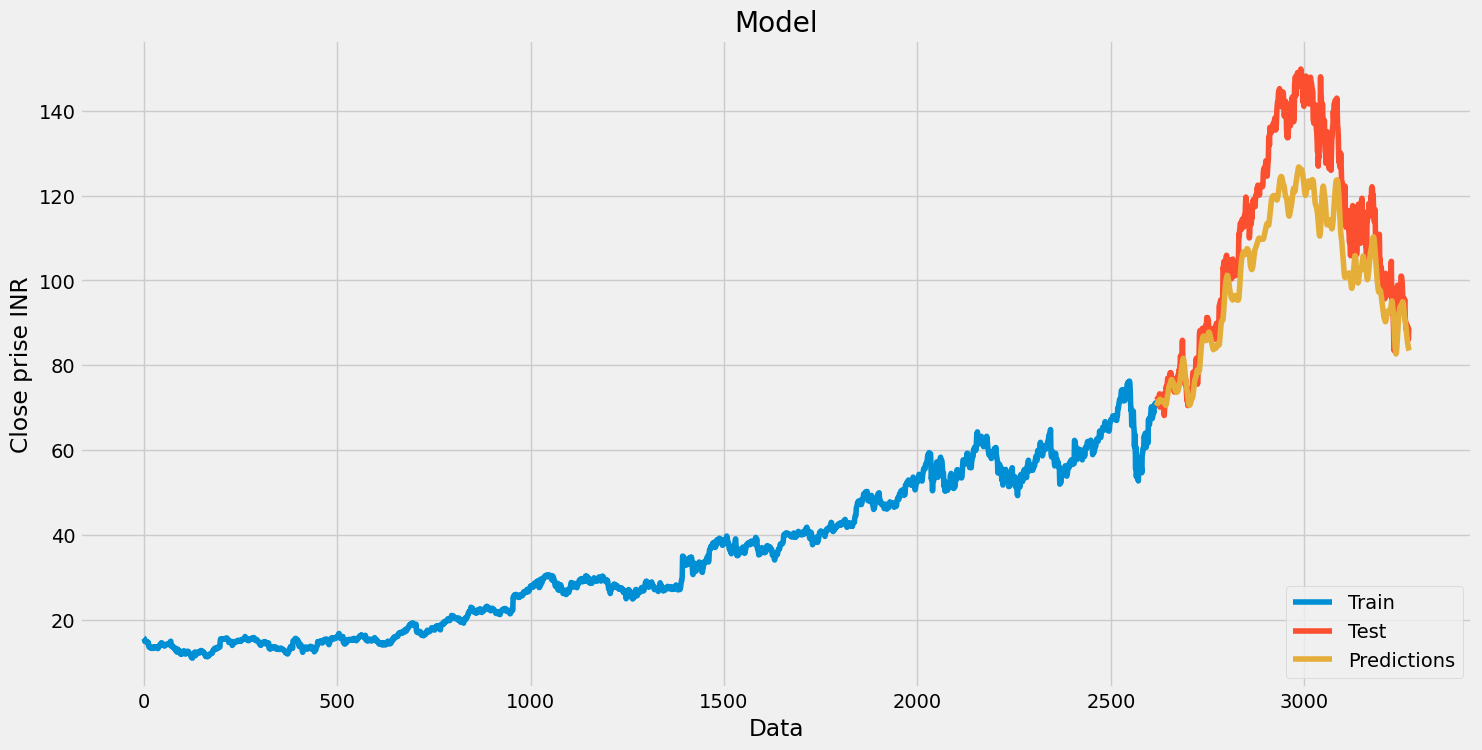

In [146]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

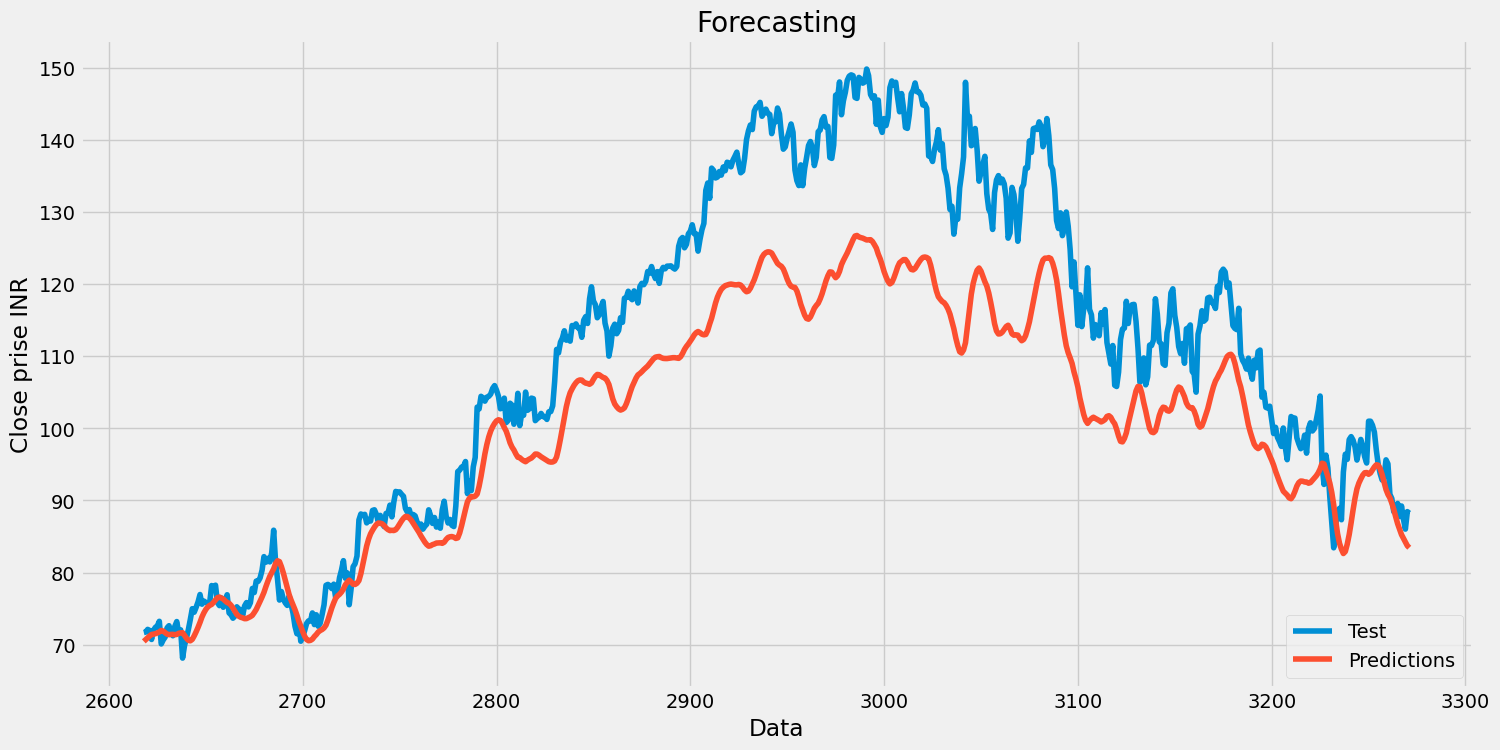

In [147]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Forecasting')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
#plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Test','Predictions'],loc='lower right')
plt.show()
